In [1]:
%pip install -q matplotlib networkx pandas torchinfo
%load_ext autoreload
%autoreload 2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import functions
import matplotlib.pyplot as plt
import torch

from functools import partial

In [3]:
results = {edge_dir: functions.evaluate_directory(f"runs/resgcn_adj_type_{edge_dir}",
                                                  partial(functions.evaluate_dirichlet_energy, on_ipu=True),
                                                  lambda chkpt: chkpt["hparams"]["model"]["adjacency_type"])
           for edge_dir in ["downstream", "upstream", "bidirectional"]}

Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [04:36<00:00, 63.38it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [04:23<00:00, 66.28it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [04:25<00:00, 65.88it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [04:24<00:00, 66.13it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [04:23<00:00, 66.38it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [04:21<00:00, 66.80it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [04:32<00:00, 64.21it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [04:32<00:00, 64.31it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [04:21<00:00, 66.91it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [04:20<00:00, 67.20it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [04:19<00:00, 67.31it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [04:26<00:00, 65.59it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [05:04<00:00, 57.50it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [05:01<00:00, 57.94it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [05:01<00:00, 58.09it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [05:02<00:00, 57.77it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [05:03<00:00, 57.74it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [05:02<00:00, 57.79it/s]


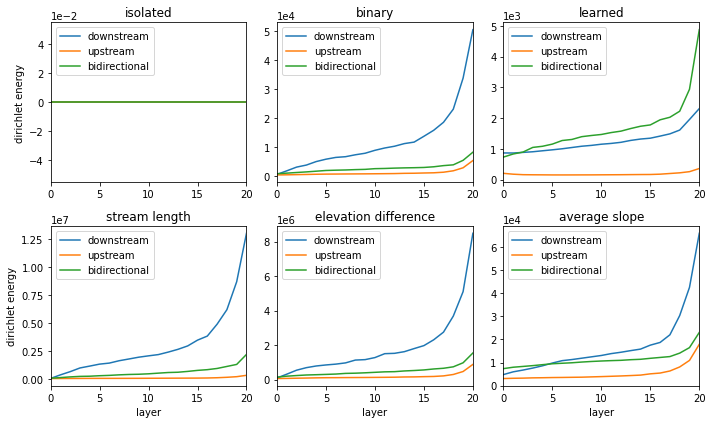

In [26]:
plt.figure(figsize=(10, 6))
i = 0
for i, a in enumerate(["isolated", "binary", "learned", "stream_length", "elevation_difference", "average_slope"]):
    plt.subplot(2, 3, i + 1)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    plt.title(a.replace("_", " "))
    for e in ["downstream", "upstream", "bidirectional"]:
        dirichlet_evo = results[e][a]
        time = list(range(dirichlet_evo.size(1)))
        plt.plot(time, dirichlet_evo.mean(dim=0), label=e)
        plt.xlim(time[0], time[-1])
    if i // 3 == 1:
        plt.xlabel("layer")
    if i % 3 == 0:
        plt.ylabel("dirichlet energy")
    plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("dirichlet_energies.pdf")
plt.show()